In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path='./dataset/netflix_titles.csv'


In [3]:
df=pd.read_csv(path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
(df.isnull().sum() / df.shape[0])*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [9]:
df['director']=df['director'].fillna('Unknown director')
df['director'].value_counts()

director
Unknown director                  2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [10]:
list = []
for i in df.select_dtypes(include = ["object"],).columns:
    df[i].fillna(df[i].mode()[0],inplace=True)
    

In [11]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
df["show_id"]

0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
8802    s8803
8803    s8804
8804    s8805
8805    s8806
8806    s8807
Name: show_id, Length: 8807, dtype: object

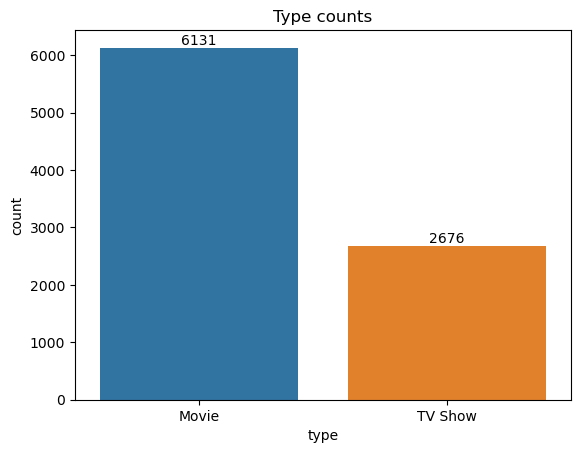

In [13]:
ax = sns.countplot(x ="type" ,data=df)
plt.title("Type counts")
ax.bar_label(ax.containers[0])
plt.show()

In [14]:
df['director'].value_counts()

director
Unknown director                  2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [15]:
#for multiple directors
directors_df=df['director'].str.split(',').explode().reset_index(drop=True)
director_counts=directors_df.value_counts().drop(labels='Unknown director', errors='ignore')

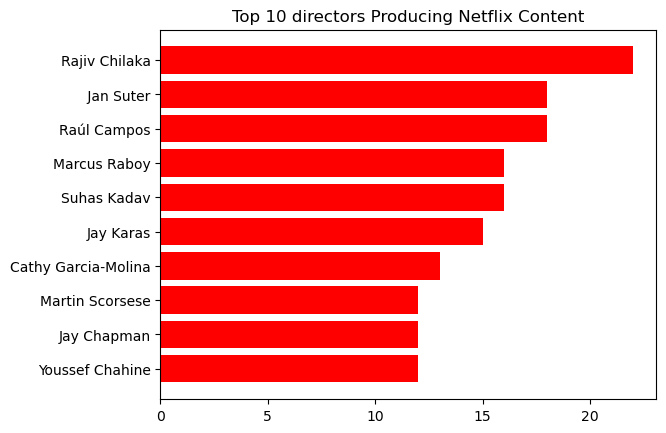

In [16]:
top_10_directors = director_counts.head(10)
top_10_directors=top_10_directors[::-1]
plt.barh(top_10_directors.index,top_10_directors.values,color='Red')
plt.title('Top 10 directors Producing Netflix Content')
# plt.xticks(rotation=90)
plt.show()

In [17]:
df["cast"].value_counts()

cast
David Attenborough                                                                                                                                                                            844
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
Craig Sechler                                                                                                                                                                                   6
                         

In [18]:
#for multiple cast
cast_df=df['cast'].str.split(',').explode().reset_index(drop=True)
cast_count=cast_df.value_counts()

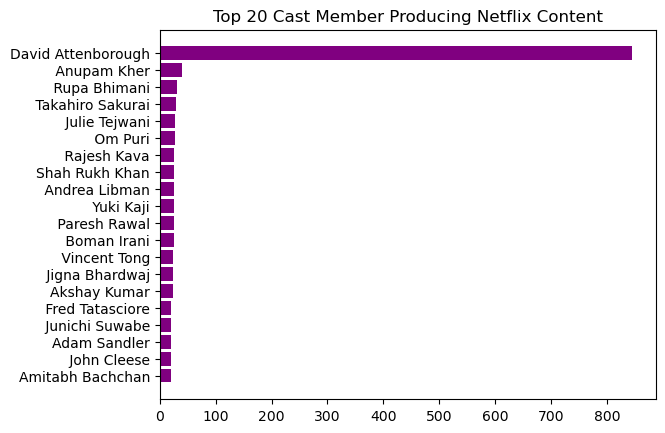

In [19]:
top_10_cast = cast_count.head(20)
top_10_cast=top_10_cast[::-1]
plt.barh(top_10_cast.index,top_10_cast.values,color='Purple')
plt.title('Top 20 Cast Member Producing Netflix Content')
plt.show()

In [20]:
df["country"].value_counts()


country
United States                             3649
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

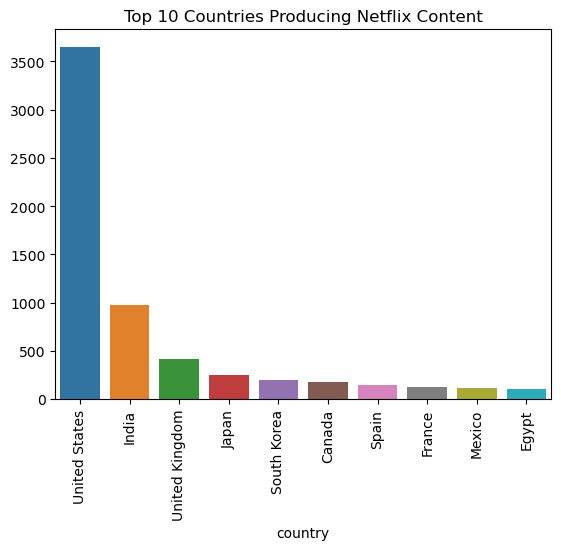

In [21]:
country_10 = df["country"].value_counts().head(10)
sns.barplot(x = country_10.index,y=country_10.values)
plt.title('Top 10 Countries Producing Netflix Content')
plt.xticks(rotation=90)
plt.show()

In [22]:
df['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

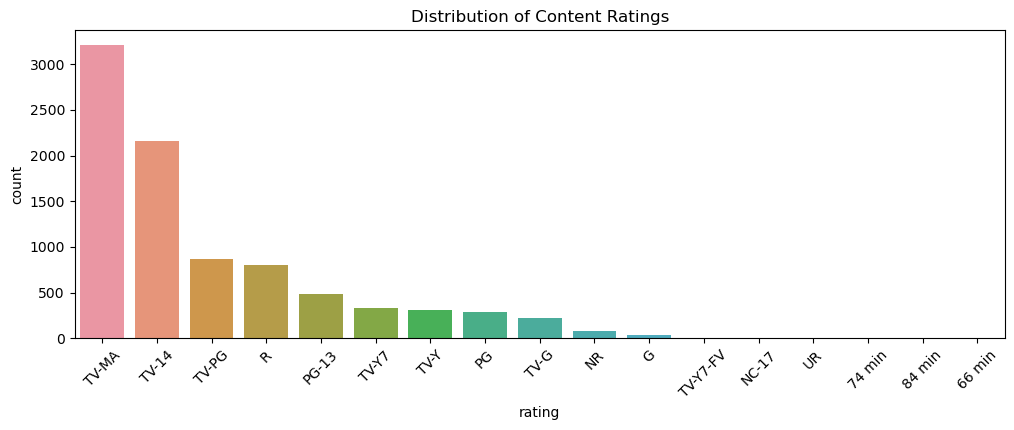

In [23]:
plt.figure(figsize = (12,4))
sns.countplot(data=df,x = "rating",order = df["rating"].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.show()

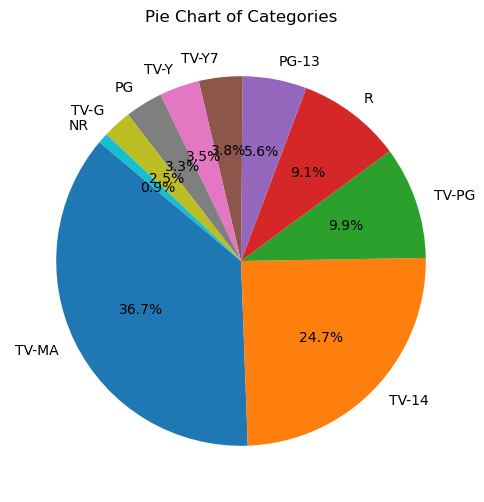

In [24]:
# Prepare data for pie plot
category_counts = df['rating'].value_counts()

# Create a pie plot using Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(category_counts[:10], labels=category_counts.index[:10], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Categories')
plt.show()

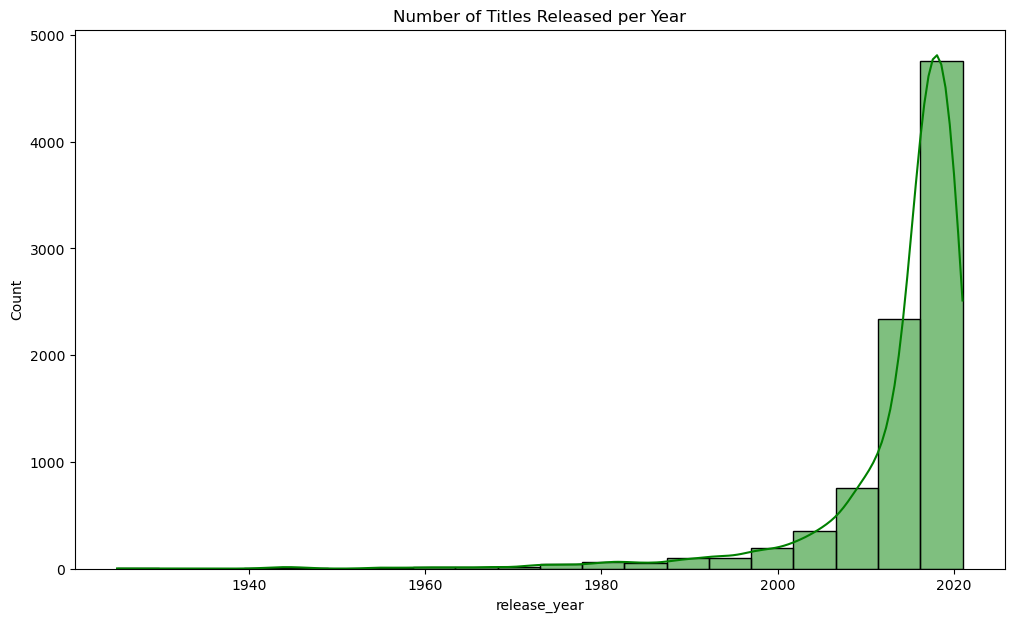

In [25]:
plt.figure(figsize=(12,7))
sns.histplot(data=df,x="release_year",kde=True,bins = 20,color = "green")
plt.title('Number of Titles Released per Year')
plt.show()

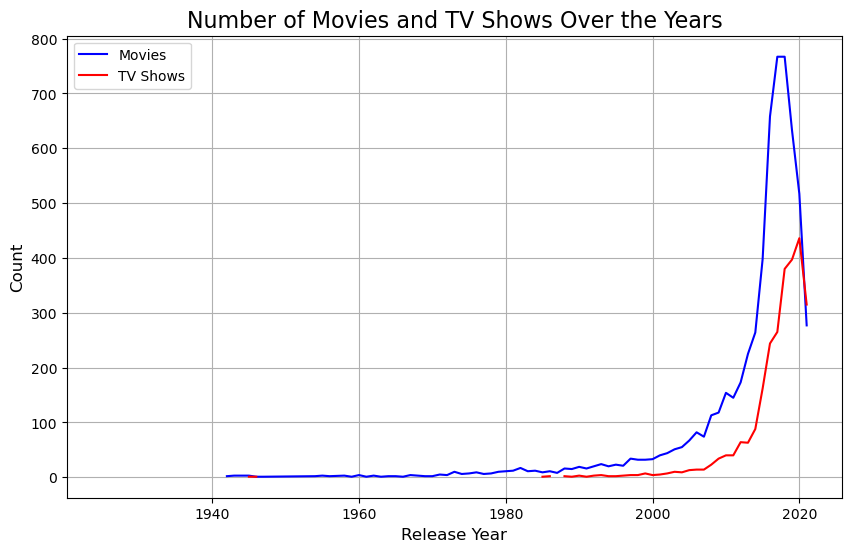

In [26]:
pivot_table=df.pivot_table(index='release_year', columns='type', values='show_id', aggfunc='count')
pivot_table
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pivot_table.index, pivot_table['Movie'], label='Movies', marker='', color='blue')
plt.plot(pivot_table.index, pivot_table['TV Show'], label='TV Shows', marker='', color='red')

# Add labels, title, and legend
plt.title('Number of Movies and TV Shows Over the Years', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [27]:
df["duration"]

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [28]:
df_movies=df[df['type']=="Movie"]
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [29]:
for i in df_movies['duration']:
    if "min" in i :
        pass
    else:
        print(i)

1 Season
1 Season
1 Season


In [30]:
df_movies[df_movies['duration']=='1 Season']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,1 Season,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,1 Season,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,1 Season,Movies,The comic puts his trademark hilarious/thought...


In [31]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [32]:
#drop row in which rating colum have min 
df = df[~df['rating'].str.contains('min', na=False)]
df_movies = df_movies[~df_movies['rating'].str.contains('min', na=False)]


In [33]:
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)

In [34]:
data = df_movies[["country","duration"]]
data['country'] = data['country'].str.split(', ')
data = data.explode('country')
average_duration = data.groupby('country')['duration'].mean().reset_index()
average_duration =average_duration[average_duration["country"]!="The country is unknown"]

/var/folders/5b/3f89_xbd1319g3jkb05nsz840000gn/T/ipykernel_1128/3067803724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country'] = data['country'].str.split(', ')


In [35]:
average_duration

,country,duration
0,,103.000000
1,Afghanistan,84.000000
2,Albania,105.000000
3,Algeria,108.333333
4,Angola,107.000000
...,...,...
117,Vatican City,96.000000
118,Venezuela,96.250000
119,Vietnam,106.285714
120,West Germany,113.333333


In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Cleaning and pre-processing

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [38]:
#stemming
def stem(text):
    y = []
    for i in text.split(' '):
        y.append(ps.stem(i).lower())

    return " ".join(y)

In [39]:
def clean_data(x):
    y = ""
    for name_with_space in x.split(','):
        y += f" {name_with_space.replace(' ','')}"
    return y
# clean_cast("Syed   ali,  raza")
df['cast']=df['cast'].apply(clean_data)
df['director']=df['director'].apply(clean_data)
df['country']=df['country'].apply(clean_data)
df['listed_in']=df['listed_in'].apply(clean_data)
df['type']=df['type'].apply(clean_data)

In [40]:
#mearge all the data in single colums for feature extraction
df['tags'] = (df['type']+" "+df['title']+" "+df['country']+df['director']+df['cast']+" "+df['description']+" "+df['listed_in'])

In [41]:
df['tags']

0        Movie Dick Johnson Is Dead  UnitedStates Kirs...
1        TVShow Blood & Water  SouthAfrica Unknowndire...
2        TVShow Ganglands  UnitedStates JulienLeclercq...
3        TVShow Jailbirds New Orleans  UnitedStates Un...
4        TVShow Kota Factory  India Unknowndirector Ma...
                              ...                        
8802     Movie Zodiac  UnitedStates DavidFincher MarkR...
8803     TVShow Zombie Dumb  UnitedStates Unknowndirec...
8804     Movie Zombieland  UnitedStates RubenFleischer...
8805     Movie Zoom  UnitedStates PeterHewitt TimAllen...
8806     Movie Zubaan  India MozezSingh VickyKaushal S...
Name: tags, Length: 8804, dtype: object

In [42]:
train_data = df[['title','tags','rating']]

train_data['tags'] = train_data['tags'].apply(stem)


print(train_data['tags'])

0        movi dick johnson is dead  unitedst kirstenjo...
1        tvshow blood & water  southafrica unknowndire...
2        tvshow gangland  unitedst julienleclercq sami...
3        tvshow jailbird new orlean  unitedst unknownd...
4        tvshow kota factori  india unknowndirector ma...
                              ...                        
8802     movi zodiac  unitedst davidfinch markruffalo ...
8803     tvshow zombi dumb  unitedst unknowndirector d...
8804     movi zombieland  unitedst rubenfleisch jessee...
8805     movi zoom  unitedst peterhewitt timallen cour...
8806     movi zubaan  india mozezsingh vickykaush sara...
Name: tags, Length: 8804, dtype: object


/var/folders/5b/3f89_xbd1319g3jkb05nsz840000gn/T/ipykernel_1128/637815951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tags'] = train_data['tags'].apply(stem)


# Feature extraction

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(train_data['tags']).toarray()
vector.shape


(8804, 5000)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vector, train_data['rating'], test_size=0.2, random_state=42)


# Model Training

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [52]:
# def classifier_results(X_train, X_test, y_train, y_test,clf):
    
#     clf.fit(X_train, y_train)

#     # Step 5: Make Predictions
#     y_pred = clf.predict(X_test)

#     # Step 6: Evaluate the Model
# #     print("Classification Report:")
# #     print(classification_report(y_test, y_pred))

#     print("Accuracy Score:", accuracy_score(y_test, y_pred))


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

def classifier_results(X_train, X_test, y_train, y_test, clf,Name):
    # Fit the classifier to the training data
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
#     print("Confusion Matrix:\n", cm)
    
    # Plotting the Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
    plt.title(f'Confusion Matrix for {Name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# Results

Accuracy Score: 0.5400340715502555


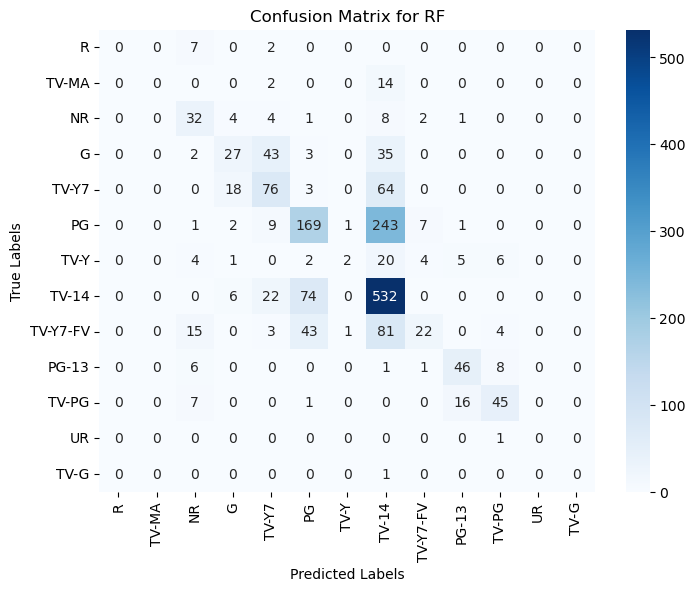

Accuracy Score: 0.47756956274843837


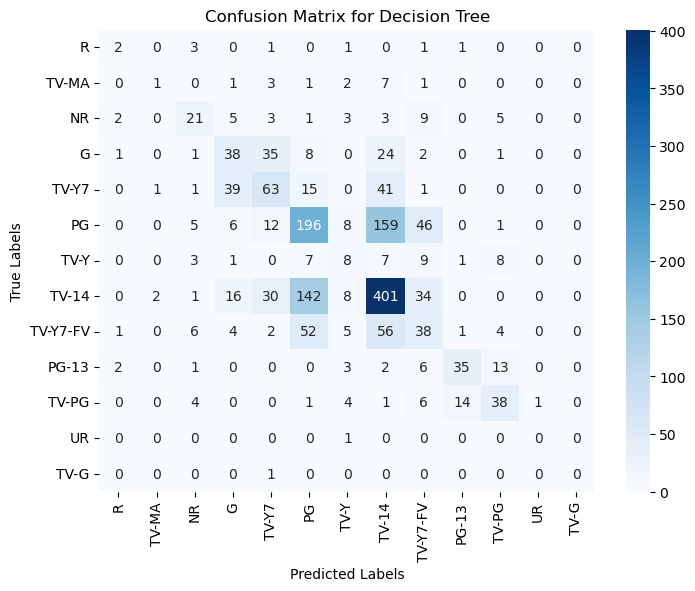

/Users/macbook/miniconda3/envs/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.5019875070982396


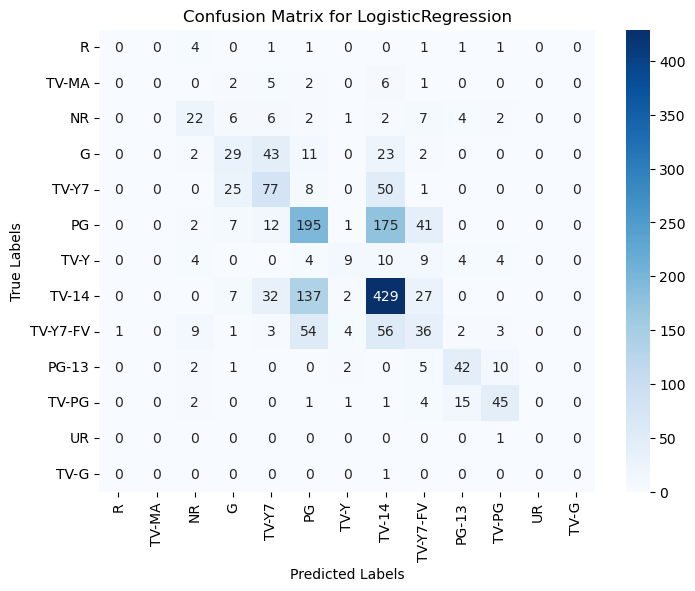

Accuracy Score: 0.44349801249290177


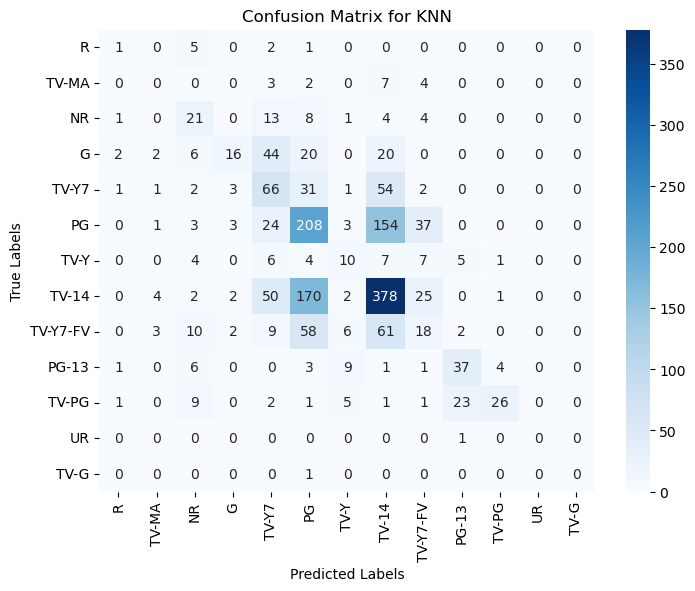

Accuracy Score: 0.5309483248154457


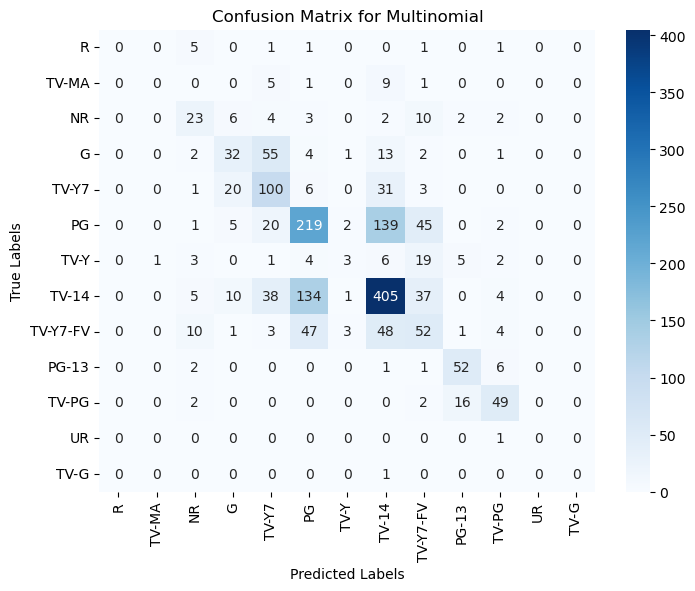

In [53]:
classifier_results(X_train, X_test, y_train, y_test,RandomForestClassifier(n_estimators=100, random_state=42),"RF")
classifier_results(X_train, X_test, y_train, y_test,DecisionTreeClassifier(random_state=42),"Decision Tree")
classifier_results(X_train, X_test, y_train, y_test,LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42),"LogisticRegression")
classifier_results(X_train, X_test, y_train, y_test,KNeighborsClassifier(n_neighbors=5),"KNN")
classifier_results(X_train, X_test, y_train, y_test,MultinomialNB(),"Multinomial")

# Recomendation system

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
def recommend(show_or_movie_name,similarity):
    # Find the index of the product in the DataFrame
    index = train_data[train_data['title'] == show_or_movie_name].index[0]
    print(f"Index of the movie : {index}")
    
    # Create a list of (index, similarity_score) without using enumerate
    distances = [(i, similarity[index][i]) for i in range(len(similarity[index]))]
    
    # Sort the distances based on similarity score in descending order
    distances = sorted(distances, reverse=True, key=lambda x: x[1])
    
    # Print the top 5 recommended products (excluding the input product)
    print("Recommended Movies:")
    for i in range(1, 6):  # Skip the first one as it is the product itself
        recommended_title = train_data.iloc[distances[i][0]].title
        print(recommended_title)


In [94]:
similarity_score = cosine_similarity(vector)

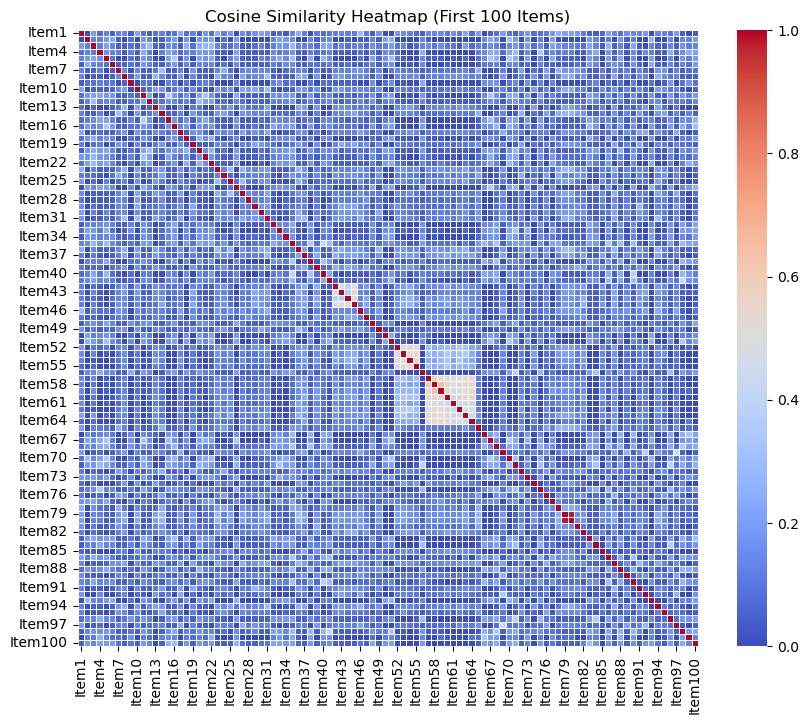

In [96]:
cosine_sim_100 = similarity_score[:100, :100]
cosine_sim_df = pd.DataFrame(
    cosine_sim_100,
    index=[f"Item{i+1}" for i in range(100)],
    columns=[f"Item{i+1}" for i in range(100)]
)

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size
sns.heatmap(cosine_sim_df, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title("Cosine Similarity Heatmap (First 100 Items)")
plt.show()

In [99]:
df['country']=df['country'].apply(lambda x : x.strip())

In [117]:
df[df['title'].str.contains("Spider", case=False, na=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags
1253,s1254,Movie,LEGO Marvel Spider-Man: Vexed by Venom,AndrewDuncan KenCunningham,RobbieDaymond BenPronsky JoshKeaton TaraStron...,UnitedStates,"March 1, 2021",2019,TV-Y,22 min,Children&FamilyMovies Comedies,When Green Goblin and Venom team up for a disa...,Movie LEGO Marvel Spider-Man: Vexed by Venom ...
4065,s4066,Movie,The Spiderwick Chronicles,MarkWaters,FreddieHighmore Mary-LouiseParker SarahBolger...,UnitedStates,"March 1, 2019",2008,PG,97 min,Children&FamilyMovies,When city-raised twins move to a tumbledown co...,Movie The Spiderwick Chronicles UnitedStates ...
6123,s6124,Movie,Along Came a Spider,LeeTamahori,MorganFreeman MonicaPotter MichaelWincott Dyl...,UnitedStates Germany Canada,"October 1, 2019",2001,R,103 min,Thrillers,When a girl is kidnapped from a prestigious pr...,Movie Along Came a Spider UnitedStates German...
8067,s8068,Movie,Spider-Man 3,SamRaimi,TobeyMaguire KirstenDunst JamesFranco ThomasH...,UnitedStates,"November 1, 2019",2007,PG-13,139 min,Action&Adventure Sci-Fi&Fantasy,The seemingly invincible Spider-Man goes up ag...,Movie Spider-Man 3 UnitedStates SamRaimi Tobe...
8068,s8069,Movie,Spider-Man: Into the Spider-Verse,PeterRamsey RodneyRothman BobPersichetti,ShameikMoore JakeJohnson HaileeSteinfeld Bria...,UnitedStates,"June 26, 2019",2018,PG,117 min,Action&Adventure Comedies,"After being bitten by a radioactive spider, Br...",Movie Spider-Man: Into the Spider-Verse Unite...


In [108]:
recommend('Hello Brother',similarity_score)


Index of the movie : 1441
Recommended Movies:
The Man Who Feels No Pain
Harud
Guna 369
Fakta Ladh Mhana
Abdo Mota


In [109]:
from sklearn.neighbors import NearestNeighbors

In [110]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [128]:
knn = NearestNeighbors(n_neighbors=6, metric='manhattan')  # Adjust 'n_neighbors' as needed
knn.fit(vector)  # Fit KNN on the feature vectors


NearestNeighbors(metric='manhattan', n_neighbors=6)

In [129]:
def recommend_movie(movie_title):
    if movie_title not in train_data['title'].values:
        print(f"'{movie_title}' not found in the dataset.")
        return
    
    # Find the index of the movie in the dataset
    movie_index = train_data[train_data['title'] == movie_title].index[0]
    
    # Find distances and indices of nearest neighbors
    distances, indices = knn.kneighbors([vector[movie_index]])  # Input is the vector of the target movie
    
    # Print recommendations
    print(f"Recommendations for '{movie_title}':")
    for i in indices[0][1:]:  # Skip the first movie (itself)
        print(train_data.iloc[i]['title'])

# Example: Recommend movies for a specific title
recommend_movie('Hello, My Twenties!')

Recommendations for 'Hello, My Twenties!':
Teresa
Girls Hostel
O-Negative, Love Can’t Be Designed
What If?
แผนร้ายนายเจ้าเล่ห์


In [130]:
print("cosine_similarity")
recommend('Spider-Man: Into the Spider-Verse',similarity_score)
print("="*50)
print("KNN")
recommend_movie('Spider-Man: Into the Spider-Verse')

cosine_similarity
Index of the movie : 8068
Recommended Movies:
WHAT DID JACK DO?
A Perfect Man
To and From New York
The First Line
Radium Girls
KNN
Recommendations for 'Spider-Man: Into the Spider-Verse':
WHAT DID JACK DO?
The First Line
Haraamkhor
Nikki Glaser: Bangin’
Natural Born Pranksters
